### **🔬 Problem Definition:**
The goal is to build a deep learning model that can classify small 32x32 pixel images from the **CIFAR-10** dataset into 10 different classes. The challenge lies in the difficulty of distinguishing these images, even for humans, due to their small size and complexity.

### **🎯 Project Objective:**
To create a **Convolutional Neural Network (CNN)** capable of classifying CIFAR-10 images with high accuracy. The model will be trained using the dataset, which consists of 60,000 32x32 color images across 10 classes.

### **🛠️ Approach:**

1. **⚙️ Environment Setup**: Import necessary libraries and set up the model-building environment.
2. **📊 Dataset Preparation**: Load and preprocess the CIFAR-10 dataset, including normalization of images and one-hot encoding of labels.
3. **🧠 Model Architecture**: Design a CNN with convolutional and fully connected layers to capture relevant features from the images.
4. **🚀 Techniques for Improvement**: Use **data augmentation**, **batch normalization**, and **dropout** to improve model performance and prevent overfitting.
5. **📝 Training**: Train the model on the training set and validate it on a validation set.
6. **📈 Evaluation**: Test the model on the test set and evaluate its performance using accuracy and other metrics.

### **🏆 Goal:**
To achieve high classification accuracy on the CIFAR-10 dataset and gain insights into image classification using deep learning tech


In [1]:
#basic
import numpy as np
import pandas as pd

# visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

# keras
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization



### ⚙️<span style="color:#808080;">**Get the data**</span>




In [2]:
# Unpack the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Split the training data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Print the shape of the datasetsprint('The shape of training data:', X_train.shape)
print('The shape of training data:', X_train.shape)
print('The shape of training labels:', y_train.shape)
print('The shape of validation data:', X_val.shape)
print('The shape of validation labels:', y_val.shape)
print('The shape of test:', X_test.shape)
print('The shape of test_label:', y_test.shape)

The shape of training data: (40000, 32, 32, 3)
The shape of training labels: (40000, 1)
The shape of validation data: (10000, 32, 32, 3)
The shape of validation labels: (10000, 1)
The shape of test: (10000, 32, 32, 3)
The shape of test_label: (10000, 1)


In [3]:
# Checking the number of unique classes 
print(np.unique(y_train))
print(np.unique(y_val))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


### <span style="color:#808080;">**Data Exploration**</span>📊


First, we start by visualizing the variable of interest.


Let's view more images in a grid format.

In [4]:
# Creating a list of all the class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

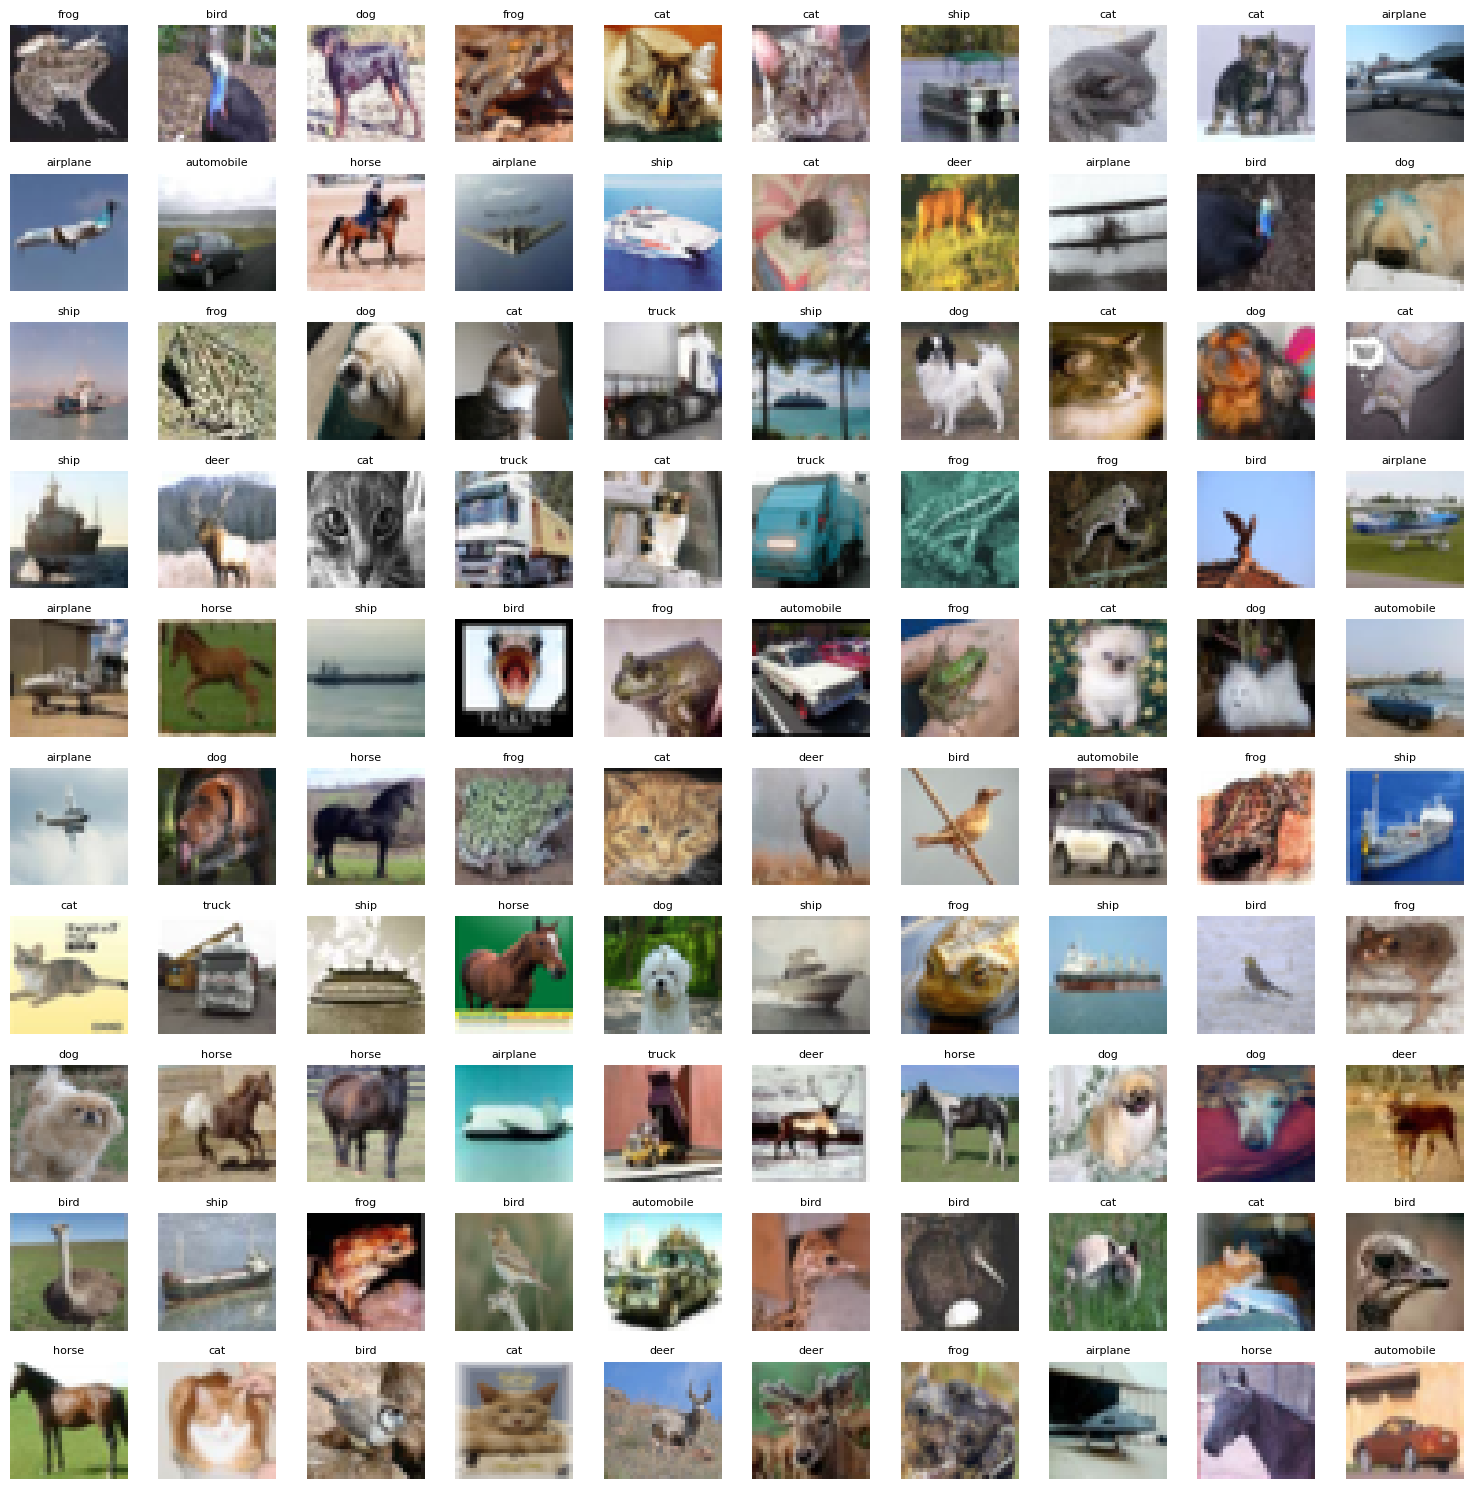

In [5]:
# Plot the first 100 images from the training set
plt.figure(figsize=(15, 15))  # Set figure size for better visibility
for i in range(100):
    plt.subplot(10, 10, i + 1)  # Create a 10x10 grid
    plt.imshow(X_train[i])
    plt.title(class_labels[int(y_train[i][0])], fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()


Now we will Create a barplot to see the class distrubtion in trainting and testing set.



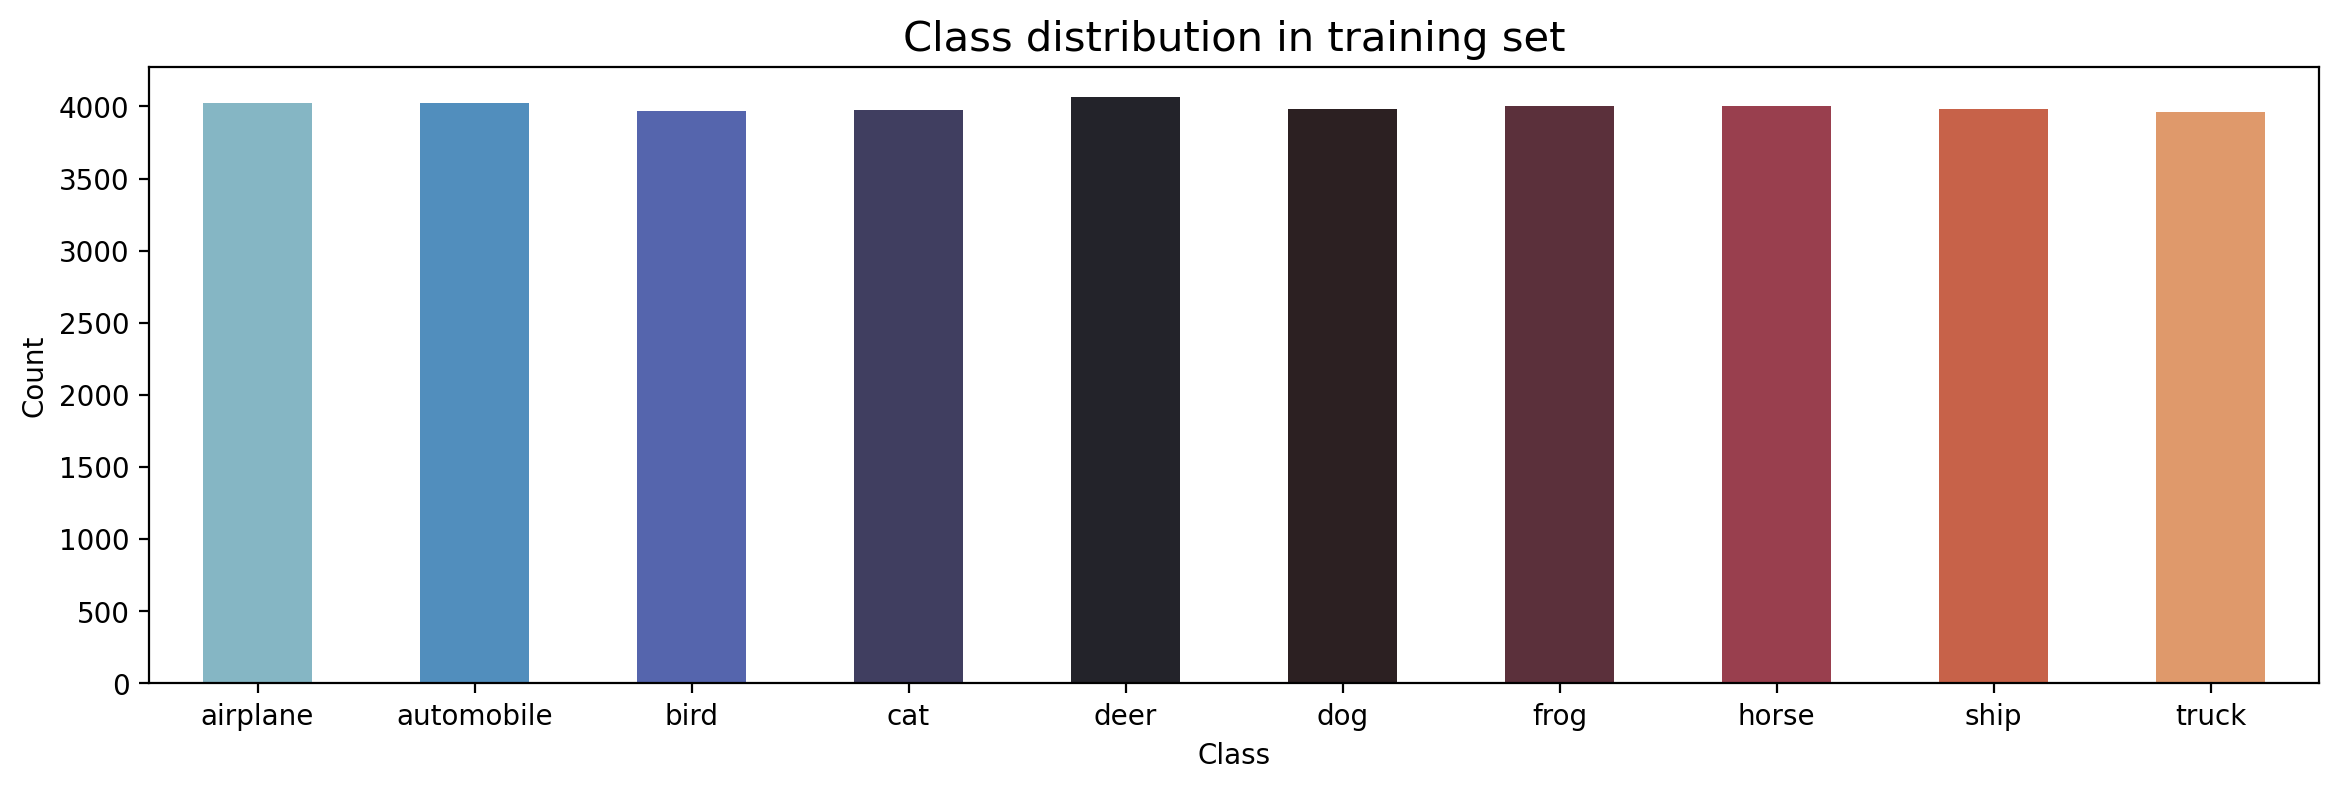

In [6]:
# count for Training dataset
label,count = np.unique(y_train,return_counts=True)
uni = pd.DataFrame(data=count, index=class_labels, columns=['Count'])
# Plot the bar chart
plt.figure(figsize=(14, 4), dpi=200)
sns.barplot(data=uni, x=uni.index, y='Count', hue=uni.index, dodge=False, palette='icefire', width=0.5).set_title('Class distribution in training set', fontsize=15)
plt.xlabel('Class', fontsize=10)
plt.show()

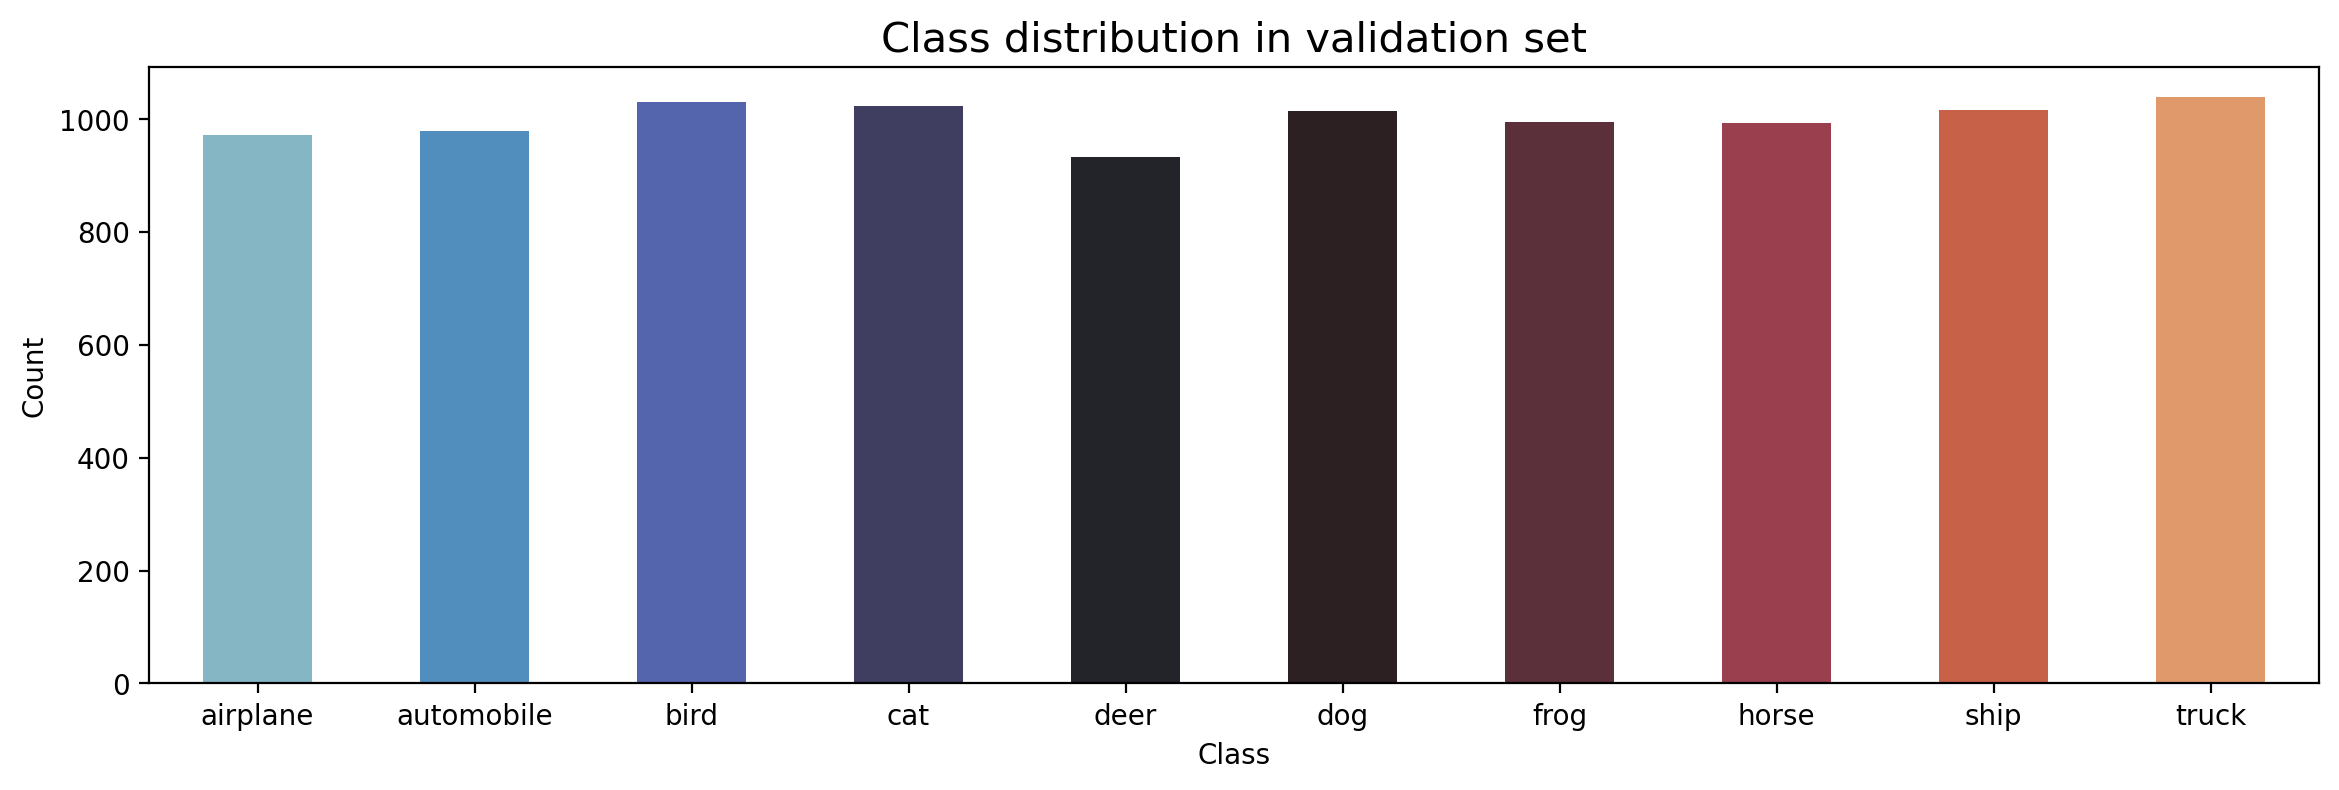

In [7]:
# count for Training dataset
label,count = np.unique(y_val,return_counts=True)
uni = pd.DataFrame(data=count, index=class_labels, columns=['Count'])
# Plot the bar chart
plt.figure(figsize=(14, 4), dpi=200)
sns.barplot(data=uni, x=uni.index, y='Count', hue=uni.index, dodge=False, palette='icefire', width=0.5).set_title('Class distribution in validation set', fontsize=15)
plt.xlabel('Class', fontsize=10)
plt.show()

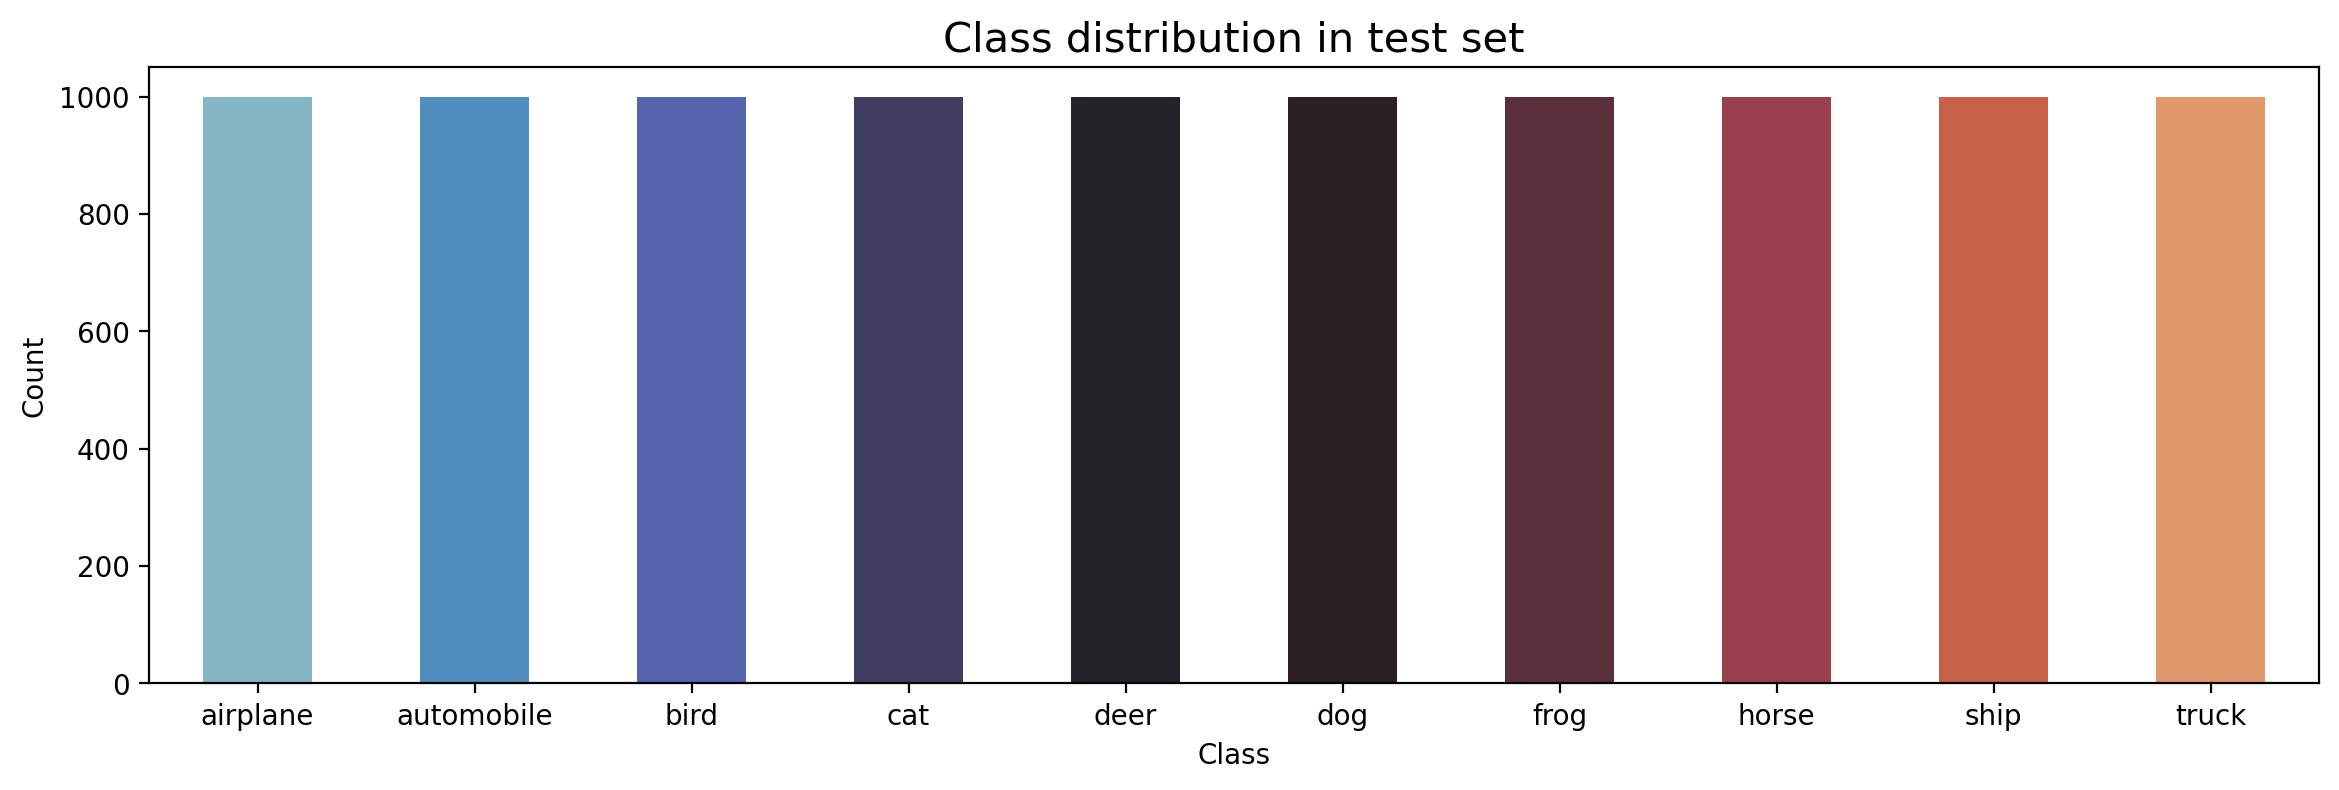

In [8]:
# count for Training dataset
label,count = np.unique(y_test,return_counts=True)
uni = pd.DataFrame(data=count, index=class_labels, columns=['Count'])
# Plot the bar chart
plt.figure(figsize=(14, 4), dpi=200)
sns.barplot(data=uni, x=uni.index, y='Count', hue=uni.index, dodge=False, palette='icefire', width=0.5).set_title('Class distribution in test set', fontsize=15)
plt.xlabel('Class', fontsize=10)
plt.show()

### 🛠<span style="color:#808080;">**Data Preprocessing**</span>


##### 
*Reasons for Preprocessing:*

1. ****Standardizing/Normalizing:**** The reason for standardizing/normalizing the data is to convert all pixel values to values between 0 and 1. This helps in speeding up the training process and ensuring that the model doesn't treat certain features as more important just because of larger values.

2. ****Converting Type to Float:**** The reason for converting the data type to float is that the `to_categorical` function (used for one-hot encoding) needs the data to be of type float by default. This ensures the proper handling of data during the encoding process.

3. ****Using `to_categorical`:**** The reason for using `to_categorical` is that the loss function we will be using in this code (`categorical_crossentropy`) requires the data to be one-hot encoded. One-hot encoding converts the labels into a binary matrix format, which is necessary for this loss function to work correctly.


In [9]:
# Function to normalize the image data
def pre_process(data):
    return data.astype('float32') / 255  # Normalize to range [0, 1]

# Function to one-hot encode the labels
def to_cat(data):
    return to_categorical(data, num_classes=10)


In [10]:
# Normalize the image data for train, validation, and test sets
X_train = pre_process(X_train)
X_test = pre_process(X_test)
X_val = pre_process(X_val)  
print(f"Normalized Train Images Shape: {X_train.shape}")
print(f"Normalized Validation Images Shape: {X_val.shape}")
print(f"Normalized Test Images Shape: {X_test.shape}")

# Ensure labels are 1D before applying to_categorical
# Flatten the labels to 1D
y_train = y_train.flatten()  
y_val = y_val.flatten()     
y_test = y_test.flatten()


# One-hot encode the labels for train, validation, and test sets
y_train = to_cat(y_train)
y_test = to_cat(y_test)
y_val = to_cat(y_val)  

print(f"One-hot Encoded Train Labels Shape: {y_train.shape}")
print(f"One-hot Encoded Validation Labels Shape: {y_val.shape}")
print(f"One-hot Encoded Test Labels Shape: {y_test.shape}")


Normalized Train Images Shape: (40000, 32, 32, 3)
Normalized Validation Images Shape: (10000, 32, 32, 3)
Normalized Test Images Shape: (10000, 32, 32, 3)
One-hot Encoded Train Labels Shape: (40000, 10)
One-hot Encoded Validation Labels Shape: (10000, 10)
One-hot Encoded Test Labels Shape: (10000, 10)


### <span style="color:#808080;">**Building the CNN Model using Keras**🚀</span>


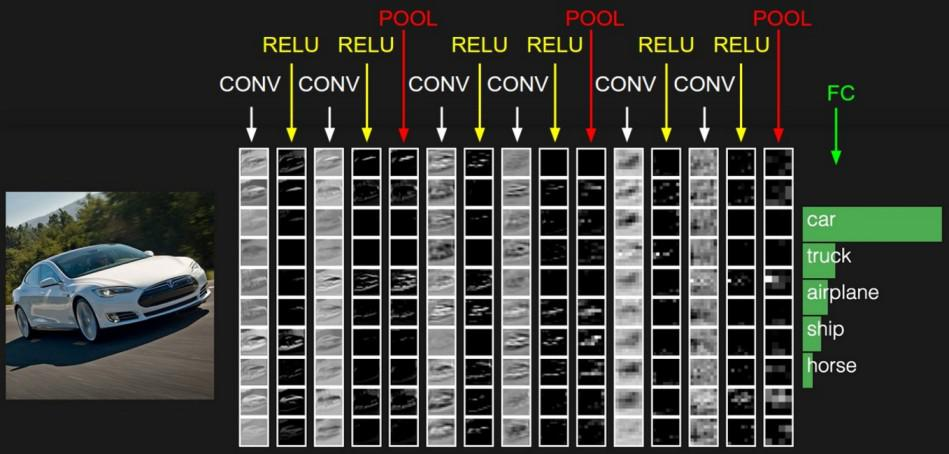

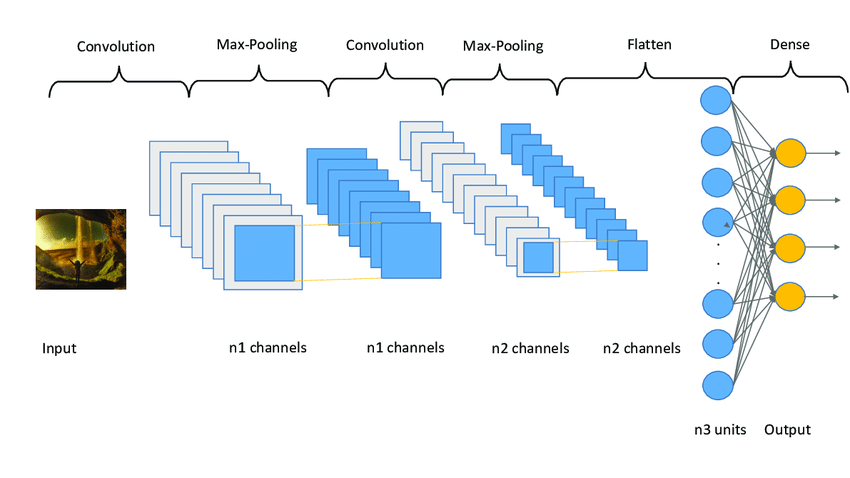

#### Summary of Convolutional Neural Networks (CNNs) 👨‍💻

Convolutional Neural Networks (CNNs) are specialized neural networks designed to process grid-like data, such as images 📸. They offer several advantages, especially for image processing tasks:

1. **Automatic Feature Extraction 🔍**: Unlike traditional algorithms, which require manual feature engineering, CNNs learn to detect important features through filters. These filters are learned and tuned during training, reducing the need for manual intervention and making the model more efficient.

2. **Efficient Processing of High-Resolution Images 🖼️**: CNNs are especially useful for processing large datasets with high-resolution images because they automatically extract relevant features without losing essential information.

3. **Convolution vs. Matrix Multiplication ➗**: CNNs use convolutions, not matrix multiplication, in at least one layer. A convolution applies filters to input data to extract features, which are refined during training.

4. **Training with Data 📊**: CNNs can learn to extract and tune filters as they are trained, improving flexibility and performance over time. This is particularly useful in tasks like facial recognition 🧑‍🦰, where the number and types of filters can be adjusted during training.

5. **Data Requirements 📈**: CNNs work best with large datasets. Although they can be trained with relatively few data points, more labeled and clean data leads to better performance. However, this also makes CNNs expensive to work with.

6. **How CNNs Work 🧠**: CNNs are inspired by neuroscience and consist of layers of artificial neurons (nodes). Each node processes data by calculating a weighted sum of inputs and returns an activation map. As data flows through the layers, the network learns increasingly complex features (e.g., edges, corners, and shapes in images). Max pooling ensures only the most important features are passed to the next layers.

7. **Final Layer - Classification 🏷️**: The last layer of the CNN is the classification layer, which makes the final prediction based on the learned features (activation maps). For example, in image classification, it identifies the object in an image.

8. **Training 🎓**: Training a CNN involves using labeled data to adjust weights through backpropagation. It's important to avoid overfitting during training to ensure the model generalizes well to unseen data.

In short, CNNs are powerful for image classification tasks because they automatically learn relevant features, handle high-dimensional data effectively, and improve with more data. They have become the backbone of many modern computer vision systems 🌍.


In [11]:
num_classes = 10
#Create the modal
model = Sequential()
# Add an Input layer
model.add(Input(shape=(32, 32, 3)))
#Adding the First Convolutional Layer
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
# Adding Batch Normalization
# BatchNormalization: This layer normalizes the input to each layer. It helps the model train faster and prevents overfitting.
model.add(layers.BatchNormalization())
# Adding a Second Convolutional Layer
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
# MaxPooling2D: This layer reduces the size of the image. It looks at small groups of pixels (2x2 here) and keeps the largest value in each group. 
model.add(layers.MaxPooling2D(pool_size=(2,2)))
#Dropout: This is a regularization technique that helps prevent overfitting.
#30% of the neurons will be turned off during training.
model.add(layers.Dropout(0.3))

##Adding More Convolutional Layers (64 Filters)
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

###Adding Even More Complex Convolutional Layers (128 Filters)
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
#Flatten: This layer converts the 2D feature maps into a 1D vector. 
model.add(layers.Flatten())
#Adding a Fully Connected Layer (Dense Layer)
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# Output Layer
#Dense(num_classes): This is the output layer. num_classes is set to 10 
#activation='softmax': Softmax is used in the output layer for multi-class classification.
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

##### Compiling the Model

When we compile the model, we specify three important components:


- Optimizer used during Back Propagation for weight and bias adjustment - Adam (adjusts the learning rate adaptively).
- 
Loss Function used - Categorical Crossentropy (used when multiple categories/classes are present
- . 
Metrics used for evaluation - Accuracy.


In [12]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

##### Fitting the Model
- Batch Size is used for Adam optimizer.
- Epochs - One epoch is one complete cycle (forward pass + backward pass).


In [13]:
history = model.fit(
    X_train,              # Training images
    y_train,              # Training labels
    batch_size=64,        # Batch size for training
    epochs=100,           # Number of epochs
    validation_data=(X_val, y_val)  # Validation images and labels
)

# Once the model is trained, evaluate it on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 125ms/step - accuracy: 0.3050 - loss: 2.2241 - val_accuracy: 0.4477 - val_loss: 1.5919
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 129ms/step - accuracy: 0.5275 - loss: 1.3060 - val_accuracy: 0.6296 - val_loss: 1.0422
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 132ms/step - accuracy: 0.6226 - loss: 1.0662 - val_accuracy: 0.6730 - val_loss: 0.9123
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - accuracy: 0.6656 - loss: 0.9490 - val_accuracy: 0.7022 - val_loss: 0.8274
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - accuracy: 0.6988 - loss: 0.8674 - val_accuracy: 0.7216 - val_loss: 0.8004
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - accuracy: 0.7203 - loss: 0.8053 - val_accuracy: 0.7508 - val_loss: 0.7111
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 124ms/step - accuracy: 0.7354 - loss: 0.7561 - val_accuracy: 0.6861 - val_loss: 0.9456
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - accuracy: 0.7582 -

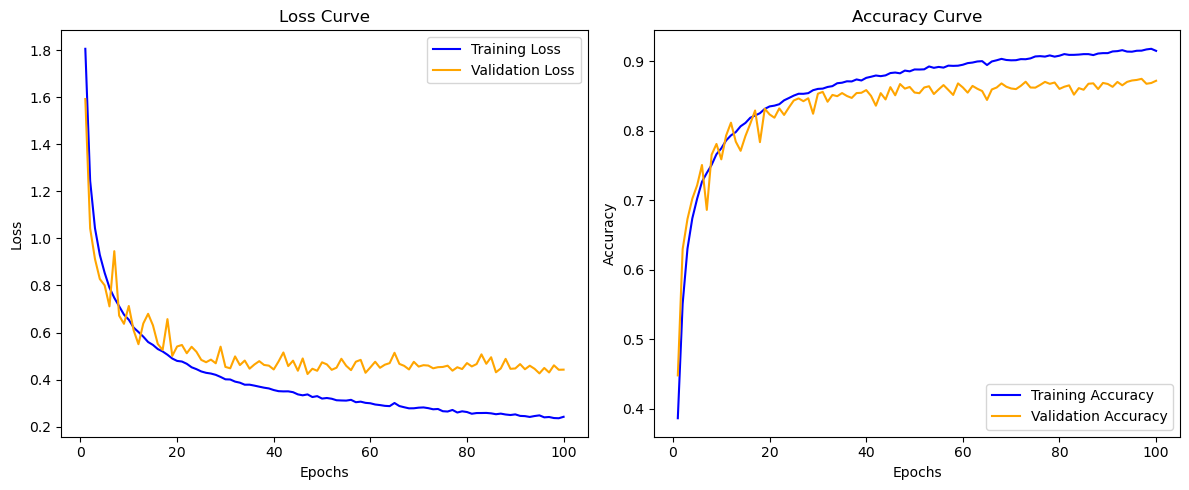

In [14]:
# Extracting data from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plotting the Loss Curve
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Predict Results

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8693 - loss: 0.4374


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict the test set using your trained model
y_pred = model.predict(X_test)  # Returns probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class labels
y_true_classes = np.argmax(y_test, axis=1)  # True class labels

# Compute metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate a classification report for detailed metrics per class
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step
Accuracy: 0.8681
Precision: 0.8683
Recall: 0.8681
F1 Score: 0.8668

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1000
           1       0.95      0.92      0.93      1000
           2       0.85      0.81      0.83      1000
           3       0.82      0.66      0.73      1000
           4       0.80      0.90      0.85      1000
           5       0.81      0.82      0.82      1000
           6       0.86      0.93      0.89      1000
           7       0.92      0.90      0.91      1000
           8       0.90      0.94      0.92      1000
           9       0.90      0.93      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


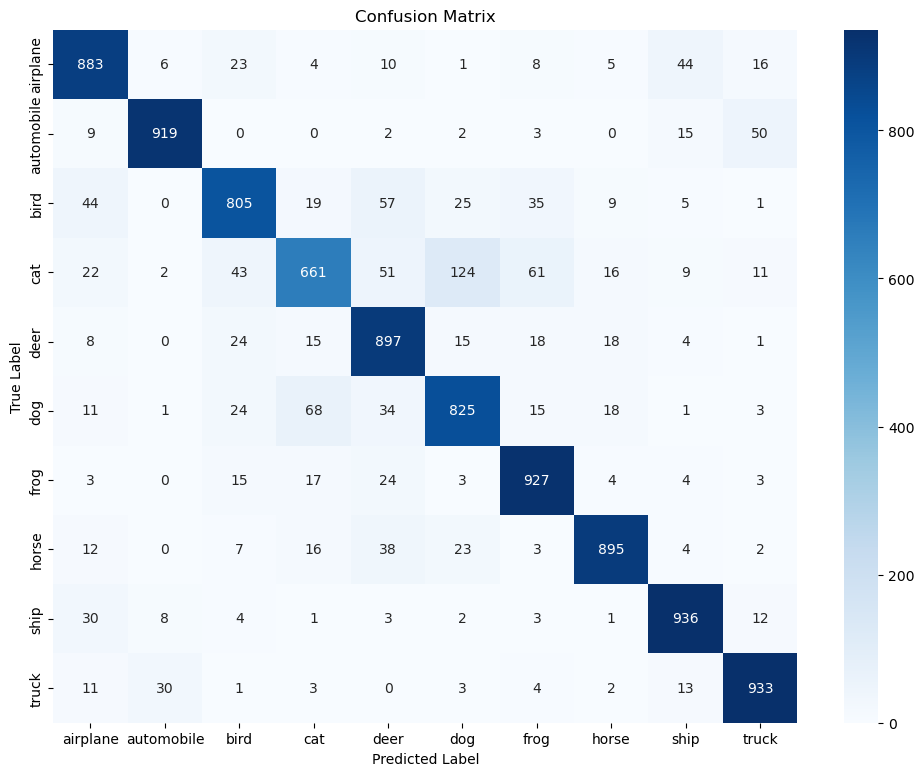

In [17]:
# Predict the values from the test dataset
y_pred = model.predict(X_test)
# Convert predictions to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert true labels to class indices
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true_classes, y_pred_classes)

# Define class names (CIFAR-10 classes)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the confusion matrix
plt.figure(figsize=(12, 9))
sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


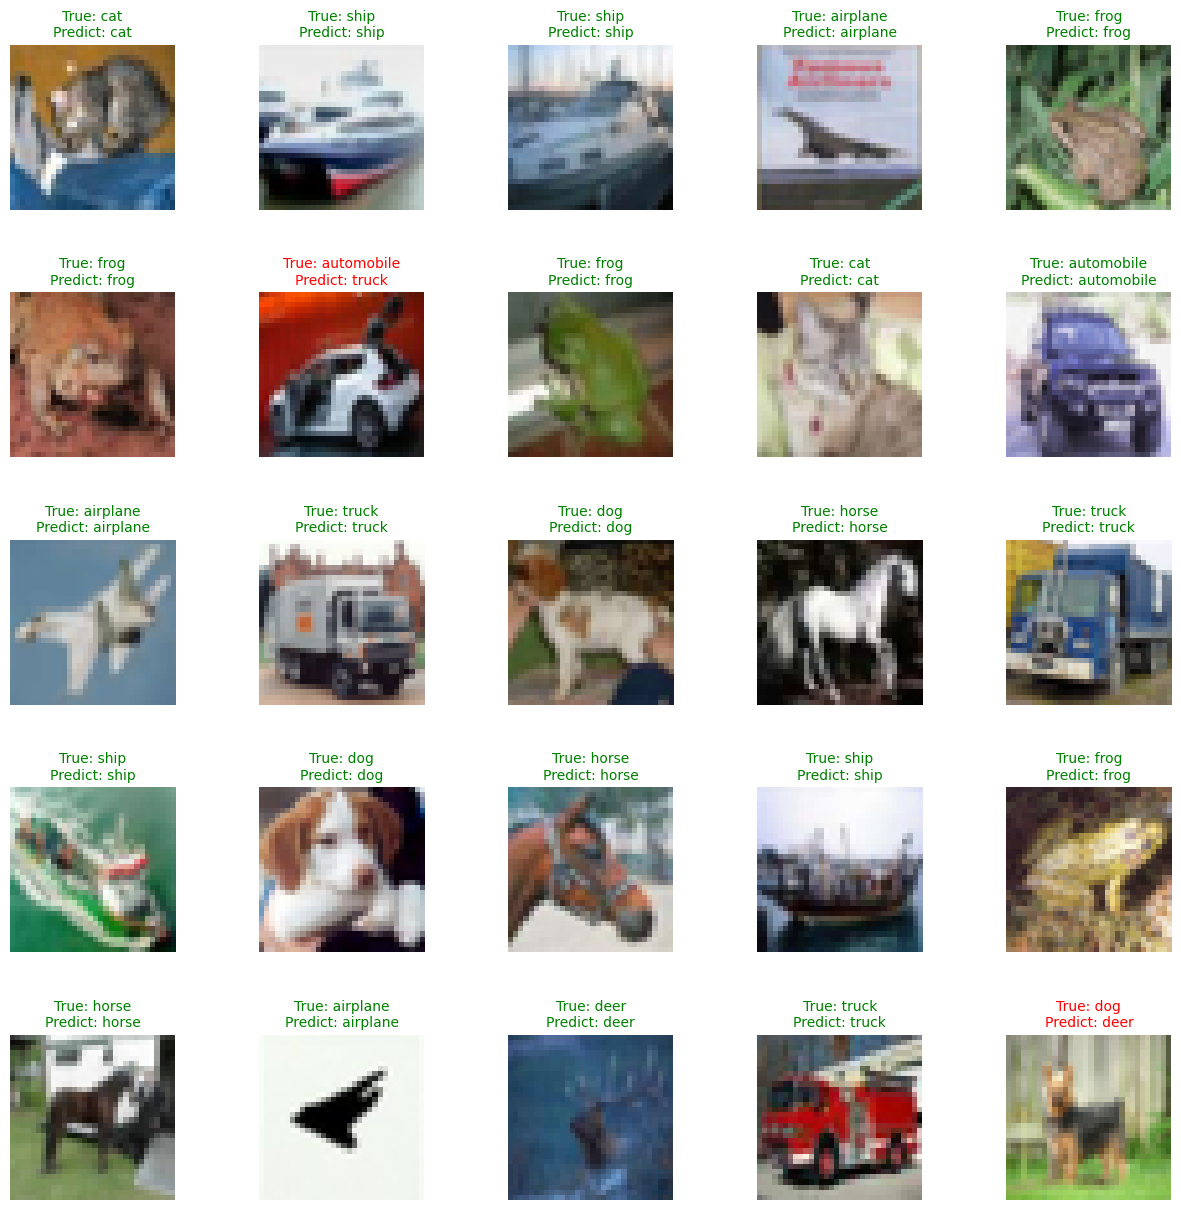

In [19]:
fig, axes = plt.subplots(5, 5, figsize=(15, 15))  # Create a 5x5 grid of subplots
axes = axes.ravel()  # Flatten the grid to make it easier to iterate

for i in range(25):  # Loop through the first 25 images
    axes[i].imshow(X_test[i])  # Show the test image
    true_label = class_names[np.argmax(y_test[i])]  # Get the true label
    predicted_label = class_names[y_pred_classes[i]]  # Get the predicted label
    
    # Set the title with color based on match
    color = 'green' if true_label == predicted_label else 'red'
    axes[i].set_title(f"True: {true_label}\nPredict: {predicted_label}", 
                      color=color, fontsize=10)  # Title with true and predicted labels
    axes[i].axis('off')  # Turn off the axes

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust spacing
plt.show()
